In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [5]:
import pandas as pd

In [8]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

PART A - Data Loading and  Basic Inspection

In [20]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [11]:
display(df.head(10)) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [12]:
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (1460, 81)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumber of numerical columns:", len(numerical_cols))
print("Numerical columns:", numerical_cols)


Number of numerical columns: 38
Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [15]:
print("\nNumber of categorical columns:", len(categorical_cols))
print("Categorical columns:", categorical_cols)


Number of categorical columns: 43
Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [17]:
incorrect_dtype_cols = [
    "MSSubClass",      # should be int
    "GarageYrBlt"      # should be int after handling NaN
]
print("Columns with incorrect data types:")
print(incorrect_dtype_cols)

Columns with incorrect data types:
['MSSubClass', 'GarageYrBlt']


 Part B: Univariate Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

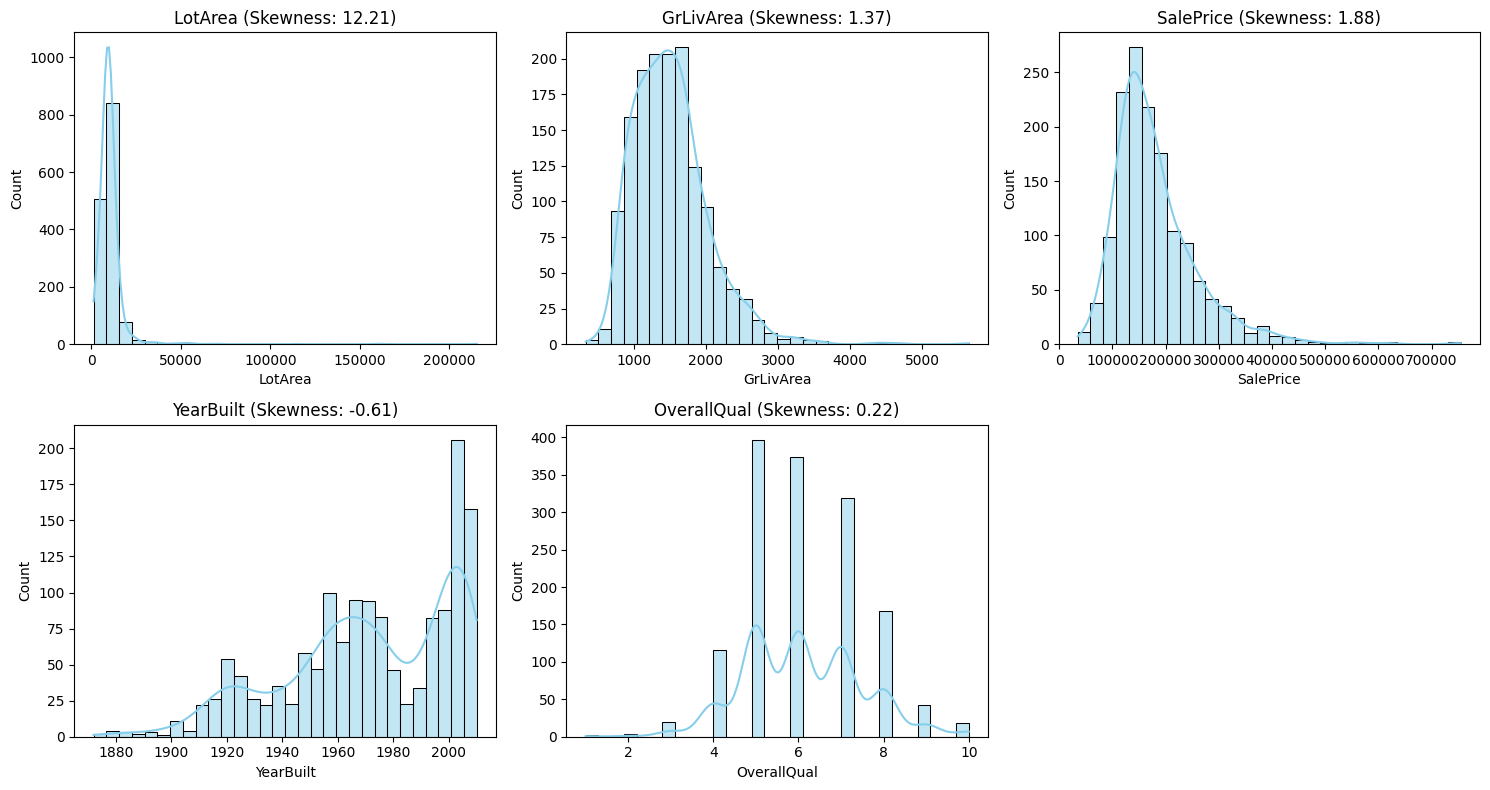

In [19]:
num_cols = ["LotArea", "GrLivArea", "SalePrice", "YearBuilt", "OverallQual"]

# Plot histograms
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"{col} (Skewness: {df[col].skew():.2f})")
plt.tight_layout()
plt.show()

Skewness close to 0 → roughly normal.

Skewness between ±0.5 → fairly symmetric.

Skewness between ±0.5 and ±1 → moderate skew.

Skewness beyond ±1 → highly skewed.

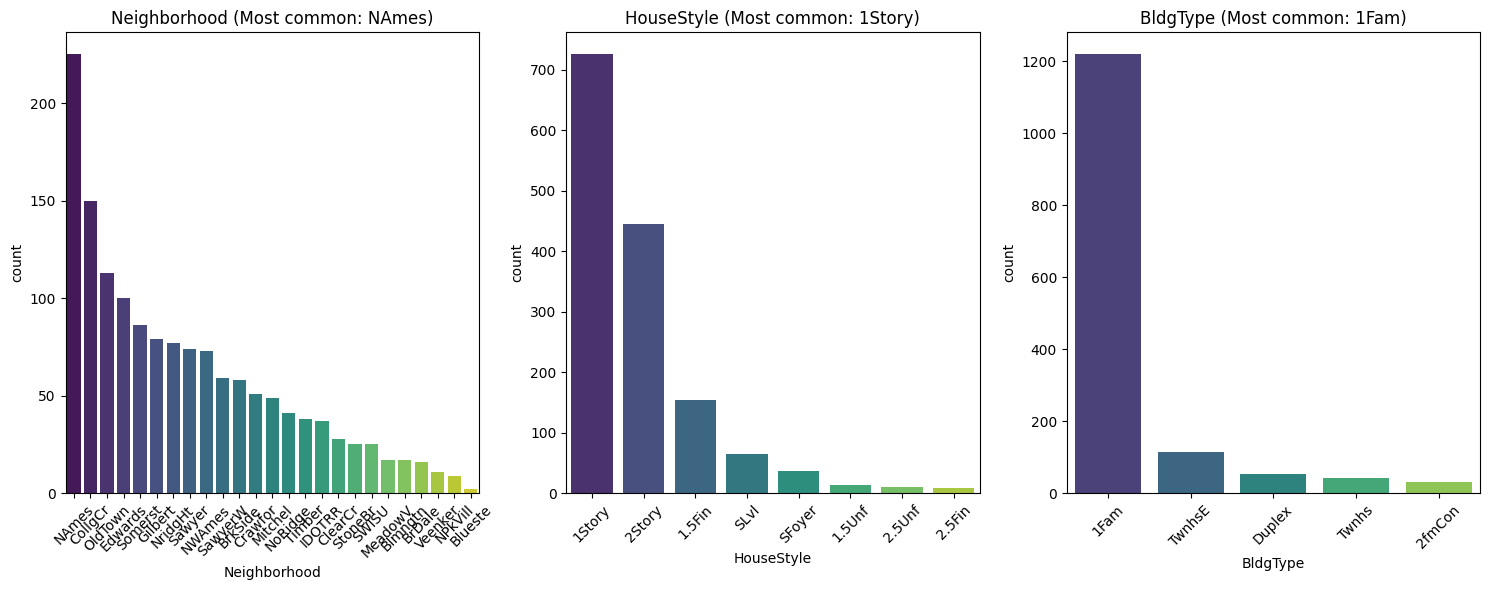

In [21]:
cat_cols = ["Neighborhood", "HouseStyle", "BldgType"]

plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{col} (Most common: {df[col].mode()[0]})")
plt.tight_layout()
plt.show()

In [22]:
cat_columns = df.select_dtypes(include=["object"]).columns

all_cats_counts = pd.Series(dtype=int)

for col in cat_columns:
    all_cats_counts = pd.concat([all_cats_counts, df[col].value_counts()])

top10_cats = all_cats_counts.sort_values(ascending=False).head(10)
print("Top 10 most frequent categories across all categorical columns:")
print(top10_cats)

Top 10 most frequent categories across all categorical columns:
AllPub     1459
Pave       1454
Norm       1445
CompShg    1434
GasA       1428
Gtl        1382
Y          1365
Typ        1360
Y          1340
SBrkr      1334
dtype: int64


In [23]:
imbalanced_cols = []

for col in cat_columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq > 0.7:
        imbalanced_cols.append((col, top_freq))

print("Imbalanced categorical columns (category share > 70%):")
for col, freq in imbalanced_cols:
    print(f"{col}: {freq:.2%} dominated by '{df[col].value_counts().idxmax()}'")

Imbalanced categorical columns (category share > 70%):
MSZoning: 78.84% dominated by 'RL'
Street: 99.59% dominated by 'Pave'
LandContour: 89.79% dominated by 'Lvl'
Utilities: 99.93% dominated by 'AllPub'
LotConfig: 72.05% dominated by 'Inside'
LandSlope: 94.66% dominated by 'Gtl'
Condition1: 86.30% dominated by 'Norm'
Condition2: 98.97% dominated by 'Norm'
BldgType: 83.56% dominated by '1Fam'
RoofStyle: 78.15% dominated by 'Gable'
RoofMatl: 98.22% dominated by 'CompShg'
MasVnrType: 75.68% dominated by 'BrkFace'
ExterCond: 87.81% dominated by 'TA'
BsmtCond: 92.13% dominated by 'TA'
BsmtFinType2: 88.33% dominated by 'Unf'
Heating: 97.81% dominated by 'GasA'
CentralAir: 93.49% dominated by 'Y'
Electrical: 91.43% dominated by 'SBrkr'
Functional: 93.15% dominated by 'Typ'
GarageQual: 95.07% dominated by 'TA'
GarageCond: 96.16% dominated by 'TA'
PavedDrive: 91.78% dominated by 'Y'
MiscFeature: 90.74% dominated by 'Shed'
SaleType: 86.78% dominated by 'WD'
SaleCondition: 82.05% dominated by 'N

Part C: Bivariate Analysis

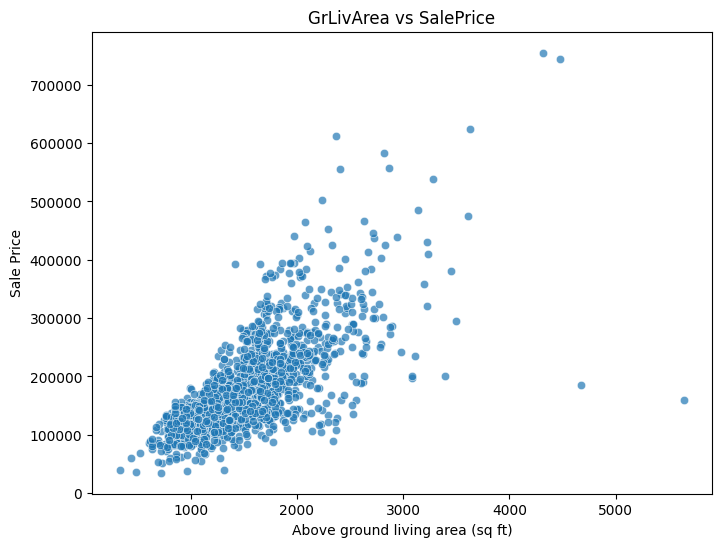

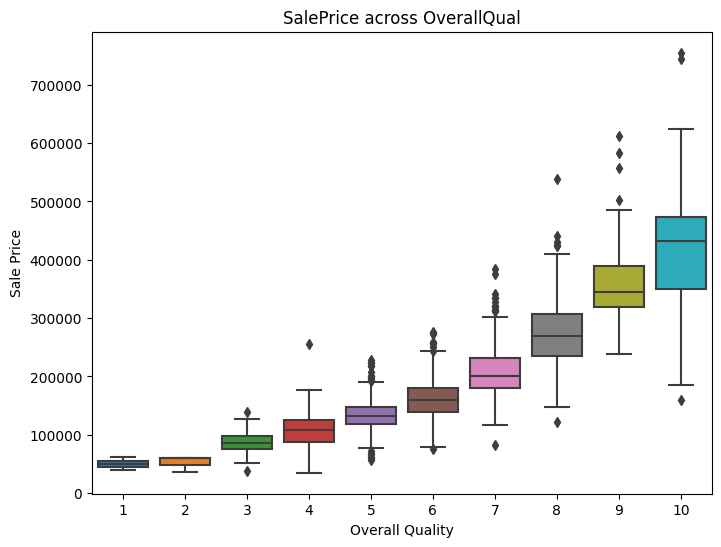

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, alpha=0.7)
plt.title("GrLivArea vs SalePrice")
plt.xlabel("Above ground living area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


## **2️⃣ Boxplot of `SalePrice` across different `OverallQual` values**

plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("SalePrice across OverallQual")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

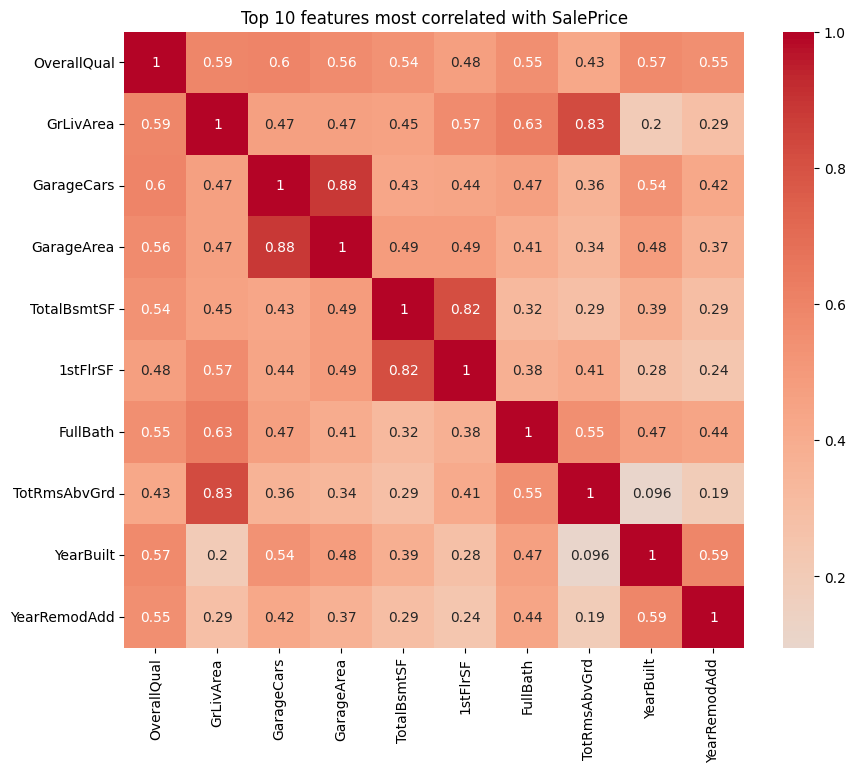

Top 10 correlated features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [28]:
# Compute correlations with SalePrice
corrs = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

top10_features = corrs.index[1:11]  # skip SalePrice itself

plt.figure(figsize=(10,8))
sns.heatmap(df[top10_features].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Top 10 features most correlated with SalePrice")
plt.show()

print("Top 10 correlated features with SalePrice:")
print(corrs.head(11))


Neighborhood
CollgCr    197965.773333
NridgHt    316270.623377
Name: SalePrice, dtype: float64


/tmp/ipykernel_36/3117803379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Neighborhood", y="SalePrice",


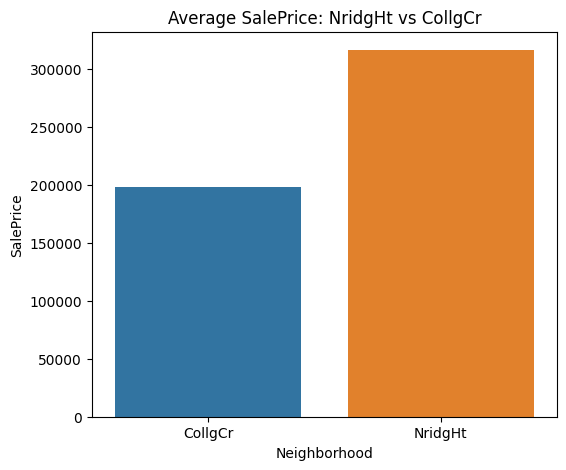

In [29]:
nb1, nb2 = "NridgHt", "CollgCr"
avg_prices = df[df["Neighborhood"].isin([nb1, nb2])].groupby("Neighborhood")["SalePrice"].mean()

print(avg_prices)

plt.figure(figsize=(6,5))
sns.barplot(x="Neighborhood", y="SalePrice", 
            data=df[df["Neighborhood"].isin([nb1, nb2])], 
            estimator=lambda x: sum(x)/len(x), ci=None)
plt.title(f"Average SalePrice: {nb1} vs {nb2}")
plt.show()


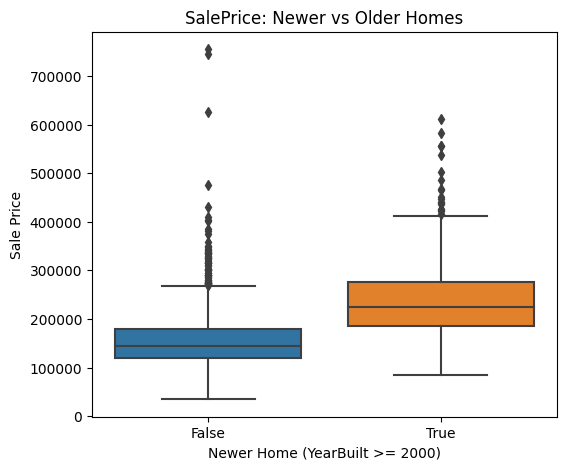

In [30]:
df["NewerHome"] = df["YearBuilt"] >= 2000

plt.figure(figsize=(6,5))
sns.boxplot(x="NewerHome", y="SalePrice", data=df)
plt.title("SalePrice: Newer vs Older Homes")
plt.xlabel("Newer Home (YearBuilt >= 2000)")
plt.ylabel("Sale Price")
plt.show()


In [31]:
from scipy.stats import ttest_ind

newer_prices = df[df["NewerHome"] == True]["SalePrice"]
older_prices = df[df["NewerHome"] == False]["SalePrice"]

t_stat, p_val = ttest_ind(newer_prices, older_prices, equal_var=False)  # Welch’s t-test
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in mean SalePrice between newer and older homes.")
else:
    print("❌ No significant difference in mean SalePrice between newer and older homes.")


T-statistic: 18.00, p-value: 0.0000
✅ Significant difference in mean SalePrice between newer and older homes.


Part D: Missing Value Treatment

In [32]:
# Count missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)

print("Missing values per column:")
print(missing_counts[missing_counts > 0])

print("\nTop 5 columns with most missing values:")
print(missing_counts.head(5))


Missing values per column:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageCond        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Top 5 columns with most missing values:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64


In [38]:
# Imputation
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage']\
                      .transform(lambda x: x.fillna(x.median()))

print("Total missing values after imputation:", df.isnull().sum().sum())

Total missing values after imputation: 0


PART E: Outlier Detection & Treatment

In [39]:
#IQR outlier detection
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

lot_outliers = iqr_outliers(df['LotArea'])
grliv_outliers = iqr_outliers(df['GrLivArea'])

print(f"LotArea outliers: {len(lot_outliers)}")
print(f"GrLivArea outliers: {len(grliv_outliers)}")

LotArea outliers: 69
GrLivArea outliers: 31


In [40]:
#cap outliers instead of removing
df['LotArea'] = np.where(df['LotArea'] > df['LotArea'].quantile(0.99),
                         df['LotArea'].quantile(0.99), df['LotArea'])
df['GrLivArea'] = np.where(df['GrLivArea'] > df['GrLivArea'].quantile(0.99),
                           df['GrLivArea'].quantile(0.99), df['GrLivArea'])

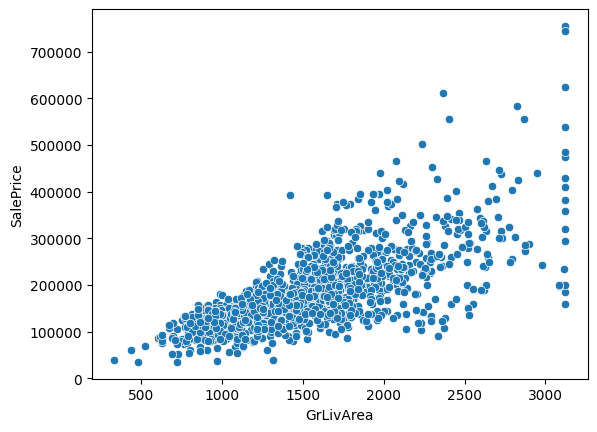

In [41]:
#scatter after capping
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

PART F: Encoding & Scaling

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [43]:
#One-hot encode categorical
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [44]:
#scale numerical
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [45]:
df_encoded.to_csv("house_prices_clean.csv", index=False)

Advanced Analysis

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
#log transform SalePrice
import numpy as np
print("Skew before:", df['SalePrice'].skew())
df['SalePrice'] = np.log1p(df['SalePrice'])
print("Skew after:", df['SalePrice'].skew())

Skew before: 1.8828757597682129
Skew after: 0.12134661989685329


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features (excluding target SalePrice)
X = df.select_dtypes(include=["number"]).drop(columns=["SalePrice"])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


           Feature           VIF
9       BsmtFinSF1           inf
11       BsmtUnfSF           inf
12     TotalBsmtSF           inf
10      BsmtFinSF2           inf
36          YrSold  2.426387e+04
25     GarageYrBlt  2.291492e+04
7     YearRemodAdd  2.253252e+04
6        YearBuilt  2.133567e+04
16       GrLivArea  5.675331e+02
13        1stFlrSF  3.251404e+02
4      OverallQual  2.639412e+02
37  Qual_x_LivArea  2.575921e+02
23    TotRmsAbvGrd  8.529622e+01
14        2ndFlrSF  6.153223e+01
5      OverallCond  4.192836e+01
22    KitchenAbvGr  3.792759e+01
26      GarageCars  3.711612e+01
21    BedroomAbvGr  3.270065e+01
27      GarageArea  3.225312e+01
19        FullBath  2.706487e+01
2      LotFrontage  1.859463e+01
3          LotArea  8.456269e+00
35          MoSold  6.671776e+00
1       MSSubClass  4.926250e+00
0               Id  4.112872e+00
17    BsmtFullBath  3.769983e+00
20        HalfBath  3.455495e+00
24      Fireplaces  3.064964e+00
28      WoodDeckSF  1.944400e+00
8       Ma

In [50]:
high_vif = vif_data[vif_data["VIF"] > 10]["Feature"]
df = df.drop(columns=high_vif)
print(f"Removed features with high VIF: {list(high_vif)}")


Removed features with high VIF: ['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold', 'Qual_x_LivArea']


In [51]:
# Compute correlation with SalePrice
corr = df.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False)
top_5_features = corr.index[1:6]  # Skip SalePrice itself
print("Top 5 correlated features:", list(top_5_features))


Top 5 correlated features: ['Fireplaces', 'NewerHome', 'MasVnrArea', 'LotArea', 'WoodDeckSF']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

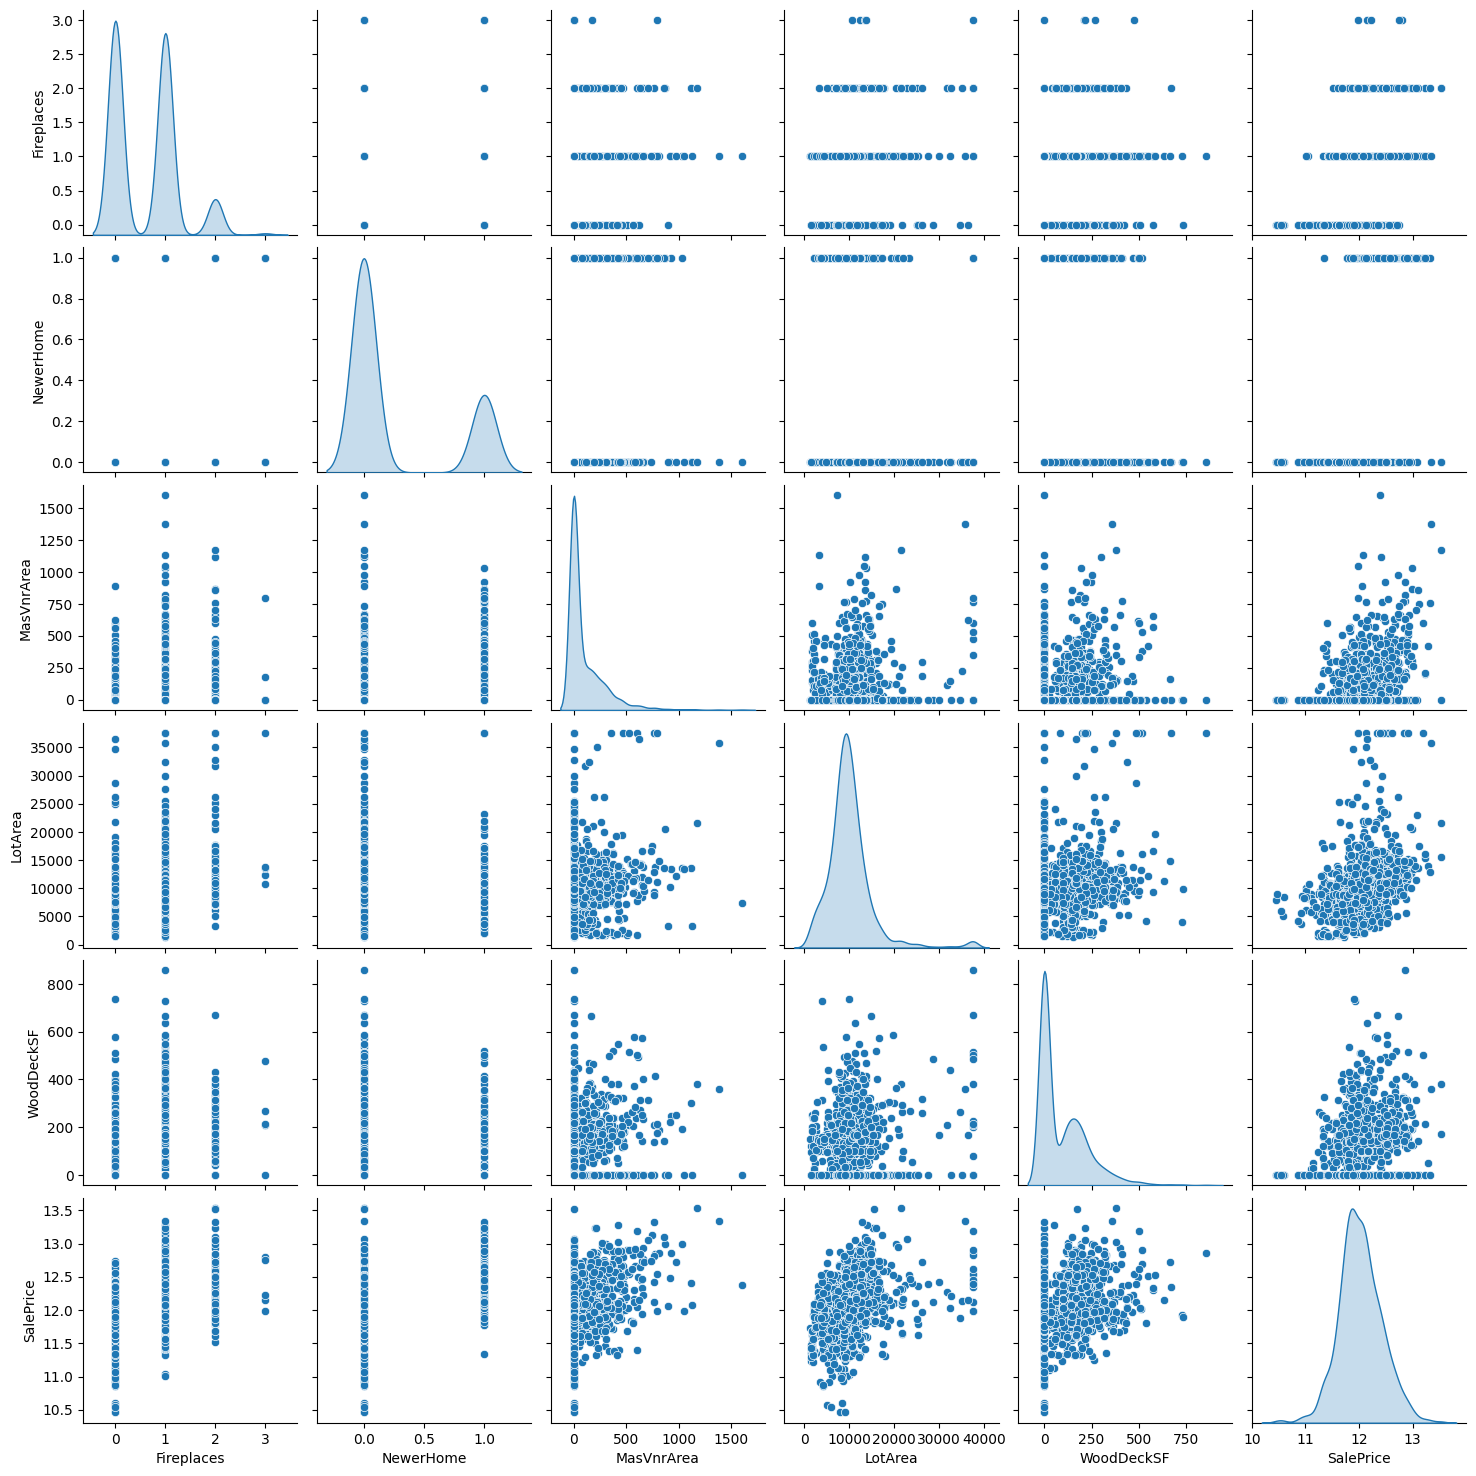

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[list(top_5_features) + ["SalePrice"]], diag_kind="kde")
plt.show()


In [48]:
#interaction effect
df['Qual_x_LivArea'] = df['OverallQual'] * df['GrLivArea']
print("Interaction feature 'Qual_x_LivArea' created.")

Interaction feature 'Qual_x_LivArea' created.
